<a href="https://colab.research.google.com/github/PRAKASHMS7/ML-Model-Evaluation/blob/main/KNN_Algarithm/knn_alg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

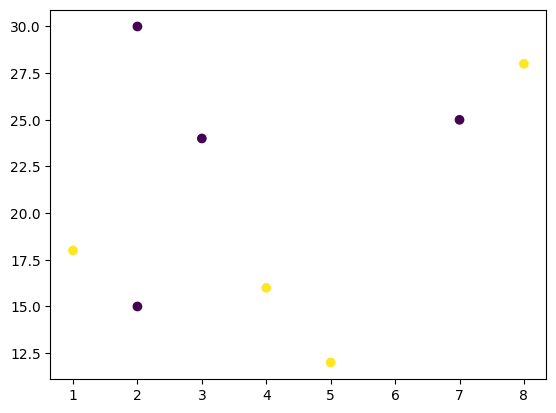

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = [5,2,1,3,7,8,2,4]
y = [12,15,18,24,25,28,30,16]
classes=[1,0,1,0,0,1,0,1]
plt.scatter(x,y, c=classes)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier#imports the KNeighborsClassifier class from the sklearn.neighbors module
data=list(zip(x,y))#This line creates a list of tuples by zipping together the arrays x and y.This format is suitable for inputting into the fit method of the classifier.
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(data,classes)#fit method uses this information to associate each data point with its class label during training.



KNeighborsClassifier(n_neighbors=2)

In [ ]:
p=7
s=24
new_point=[(p,s)]
predicted_class = knn.predict(new_point)[0] #[0]: This indexing selects the first (and only) element of the list returned by predict, which is the predicted class for the new data point.

In [ ]:
distances = [np.sqrt((p - x[i])**2 + (s - y[i])**2) for i in range(len(x))]

print("Euclidean distances from the new point to each existing point:")
for i, d in enumerate(distances):#i represents the index of the current element in the distances list.
#d represents the value (Euclidean distance) at the current index.
#enumurating means extracting the information from the data
       print(f"Point ({x[i]}, {y[i]}) -> Distance: {d} --> Class: {classes[i]}")

print(f"The predicted class for the new point ({p}, {s}) is = {predicted_class}")

Euclidean distances from the new point to each existing point:
Point (5, 12) -> Distance: 12.165525060596439 --> Class: 1
Point (2, 15) -> Distance: 10.295630140987 --> Class: 0
Point (1, 18) -> Distance: 8.48528137423857 --> Class: 1
Point (3, 24) -> Distance: 4.0 --> Class: 0
Point (7, 25) -> Distance: 1.0 --> Class: 0
Point (8, 28) -> Distance: 4.123105625617661 --> Class: 1
Point (2, 30) -> Distance: 7.810249675906654 --> Class: 0
Point (4, 16) -> Distance: 8.54400374531753 --> Class: 1
The predicted class for the new point (7, 24) is = 0


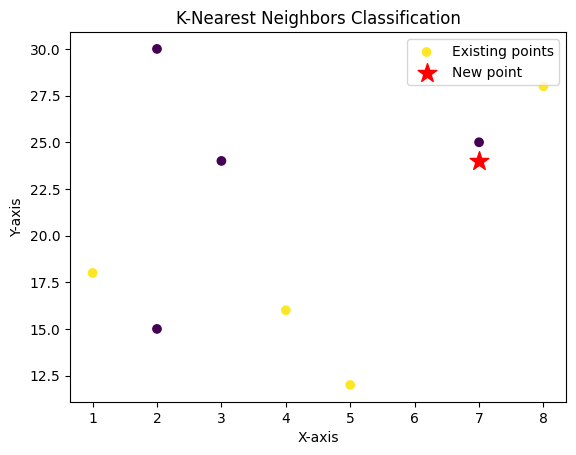

In [ ]:
plt.scatter(x, y, c=classes,  label='Existing points')
plt.scatter(p, s, c='red', marker='*',s=200, label='New point')
plt.legend()# legend means box or area
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('K-Nearest Neighbors Classification')
plt.show()




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import numpy as np


file_path = '/content/All.csv'
data = pd.read_csv(file_path)

data = data.dropna()

X = data.drop(columns=['URL_Type_obf_Type'])
y = data['URL_Type_obf_Type']


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

feature_importances = rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Get the names of the features
feature_names = X.columns

# Extract the top 20 features
top_20_features = feature_names[indices][:20]
top_20_importances = feature_importances[indices][:20]


top_20_features_df = pd.DataFrame({
    'Feature': top_20_features,
    'Importance': top_20_importances
})

print(top_20_features_df)


                    Feature  Importance
0         avgdomaintokenlen    0.040538
1       NumberRate_FileName    0.031043
2     Extension_LetterCount    0.028178
3      Extension_DigitCount    0.027313
4              domainlength    0.027128
5              pathurlRatio    0.026178
6                    urlLen    0.025787
7        SymbolCount_Domain    0.025245
8   CharacterContinuityRate    0.024087
9        domain_token_count    0.023021
10              fileNameLen    0.022732
11               pathLength    0.022573
12                subDirLen    0.022143
13                      tld    0.022104
14           domainUrlRatio    0.020630
15   LongestPathTokenLength    0.020625
16       longdomaintokenlen    0.020521
17           Entropy_Domain    0.020205
18          pathDomainRatio    0.019663
19        host_letter_count    0.019400


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import numpy as np

file_path = '/content/All.csv'
data = pd.read_csv(file_path)

data = data.dropna()

X = data.drop(columns=['URL_Type_obf_Type'])
y = data['URL_Type_obf_Type']


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y_encoded)

feature_importances = rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]


feature_names = X.columns

top_20_features = feature_names[indices][:20]


X_top_20 = X[top_20_features]


scaler = StandardScaler()
X_top_20 = scaler.fit_transform(X_top_20)

X_train, X_test, y_train, y_test = train_test_split(X_top_20, y_encoded, test_size=0.3, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)


y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)


print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Classification Report:\n{report}')


Accuracy: 0.93099209833187
Precision: 0.9311944738791005
Recall: 0.93099209833187
F1 Score: 0.9304651269346493
Classification Report:
              precision    recall  f1-score   support

  Defacement       0.90      0.95      0.92       719
      benign       0.89      0.95      0.92       806
     malware       0.94      0.94      0.94      1347
    phishing       0.91      0.83      0.87      1222
        spam       0.98      0.98      0.98      1601

    accuracy                           0.93      5695
   macro avg       0.92      0.93      0.93      5695
weighted avg       0.93      0.93      0.93      5695

